In [1]:
# This notebook is adapted from the following sources:
# https://github.com/edyoda/data-science-complete-tutorial/blob/master/2.%20Pandas%20for%20Machine%20Learning.ipynb
# https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html

### 1. Introduction to Pandas
* High Performance, Easy-to-use open source library for Data Analysis
* Creates tabular format of data from different sources like csv, json, database.
* Have utilities for descriptive statistics, aggregation, handling missing data
* Database utilities like merge, join are available
* Fast, Programmable & Easy alternative to spreadsheets

In [4]:
import pandas as pd
import numpy as np

ModuleNotFoundError: No module named 'pandas'

#### Dataframes

At a very basic level, Pandas objects can be thought of as enhanced versions of NumPy structured arrays in which the rows and columns are identified with labels rather than simple integer indices.
As we will see during the course of this chapter, Pandas provides a host of useful tools, methods, and functionality on top of the basic data structures, but nearly everything that follows will require an understanding of what these structures are.
Thus, before we go any further, let's take a look at these three fundamental Pandas data structures: the `Series`, `DataFrame`, and `Index`.


In [3]:
# Dataframe from files including tabular data like .csv and .xlsx
df = pd.read_csv('data_hr.csv')

NameError: name 'pd' is not defined

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.columns

NameError: name 'df' is not defined

In [61]:
df['salary']

0           low
1        medium
2        medium
3           low
4           low
          ...  
14994       low
14995       low
14996       low
14997       low
14998       low
Name: salary, Length: 14999, dtype: object

In [6]:
df.values

NameError: name 'df' is not defined

In [57]:
# Note that dtype of the array is an object since numeric and string values are together
df.values[0]

array([0.38, 0.53, 2, 157, 3, 0, 1, 0, 'sales', 'low'], dtype=object)

In [59]:
df.index

RangeIndex(start=0, stop=14999, step=1)

In [11]:
students = [['jack', 34, 'Sydeny', 'Australia',85.96],
            ['Riti', 30, 'Delhi', 'India',95.20],
            ['Vansh', 31, 'Delhi', 'India',85.25],
            ['Nanyu', 32, 'Tokyo', 'Japan',74.21],
            ['Maychan', 16, 'New York', 'US',99.63],
            ['Mike', 17, 'las vegas', 'US',47.28]]
 
# Create a DataFrame from the list of lists
df = pd.DataFrame(students,
                  columns=['Name', 'Age', 'City', 'Country','Agg_Marks'])

df
 

,Name,Age,City,Country,Agg_Marks
0,jack,34,Sydeny,Australia,85.96
1,Riti,30,Delhi,India,95.20
2,Vansh,31,Delhi,India,85.25
3,Nanyu,32,Tokyo,Japan,74.21
4,Maychan,16,New York,US,99.63
5,Mike,17,las vegas,US,47.28


In [12]:
df.set_index('Name', inplace=True)
df

,Age,City,Country,Agg_Marks
Name,,,,
jack,34,Sydeny,Australia,85.96
Riti,30,Delhi,India,95.20
Vansh,31,Delhi,India,85.25
Nanyu,32,Tokyo,Japan,74.21
Maychan,16,New York,US,99.63
Mike,17,las vegas,US,47.28


In [62]:
# Dataframe from numpy array
df = pd.DataFrame(np.random.randint(1,100,size=(10,10)))
df

,0,1,2,3,4,5,6,7,8,9
0,12,35,23,86,82,92,33,35,95,94
1,24,30,15,25,63,92,2,72,78,16
2,44,92,39,89,27,9,25,84,14,43
3,93,74,54,42,80,54,34,50,3,50
4,45,22,30,54,40,92,35,80,13,91
5,89,38,12,98,59,7,64,66,77,7
6,35,30,14,15,4,71,33,67,48,49
7,31,50,61,16,35,45,14,85,66,83
8,20,25,64,21,19,60,24,9,5,93
9,52,10,41,55,10,74,38,15,40,96


In [74]:
df = pd.DataFrame(data=np.random.randint(1,10,size=(10,10)), index=list('ABCDEFGHIJ'), columns=list('abcdefghij'))
df

,a,b,c,d,e,f,g,h,i,j
A,7,7,6,4,3,1,1,3,3,3
B,4,1,8,4,1,8,8,9,9,7
C,9,5,2,7,7,7,7,5,9,5
D,4,9,7,8,9,8,6,1,7,5
E,4,1,3,1,7,9,8,2,4,7
F,7,3,4,1,5,8,4,5,8,7
G,4,7,2,9,1,5,2,3,9,4
H,7,9,3,2,1,7,3,2,3,4
I,9,2,5,5,4,2,5,1,9,6
J,8,2,3,5,6,2,3,2,7,8


In [65]:
df + 1

,a,b,c,d,e,f,g,h,i,j
A,10,9,6,4,4,3,4,5,8,2
B,10,2,10,4,7,3,3,4,7,8
C,8,6,10,5,10,5,7,2,8,8
D,5,8,6,7,2,2,4,4,2,10
E,3,2,10,3,5,2,7,10,3,5
F,3,7,4,7,7,7,5,2,5,8
G,7,5,10,6,10,9,4,6,10,8
H,9,8,2,8,3,10,2,2,6,3
I,7,6,3,9,9,10,7,2,2,4
J,7,2,2,8,5,7,6,9,2,8


In [76]:
df ** df

,a,b,c,d,e,f,g,h,i,j
A,823543,823543,46656,256,27,1,1,27,27,27
B,256,1,16777216,256,1,16777216,16777216,387420489,387420489,823543
C,387420489,3125,4,823543,823543,823543,823543,3125,387420489,3125
D,256,387420489,823543,16777216,387420489,16777216,46656,1,823543,3125
E,256,1,27,1,823543,387420489,16777216,4,256,823543
F,823543,27,256,1,3125,16777216,256,3125,16777216,823543
G,256,823543,4,387420489,1,3125,4,27,387420489,256
H,823543,387420489,27,4,1,823543,27,4,27,256
I,387420489,4,3125,3125,256,4,3125,1,387420489,46656
J,16777216,4,27,3125,46656,4,27,4,823543,16777216


In [75]:
np.sin(df * np.pi / 4)

,a,b,c,d,e,f,g,h,i,j
A,-7.071068e-01,-0.707107,-1.000000e+00,1.224647e-16,7.071068e-01,7.071068e-01,7.071068e-01,0.707107,7.071068e-01,7.071068e-01
B,1.224647e-16,0.707107,-2.449294e-16,1.224647e-16,7.071068e-01,-2.449294e-16,-2.449294e-16,0.707107,7.071068e-01,-7.071068e-01
C,7.071068e-01,-0.707107,1.000000e+00,-7.071068e-01,-7.071068e-01,-7.071068e-01,-7.071068e-01,-0.707107,7.071068e-01,-7.071068e-01
D,1.224647e-16,0.707107,-7.071068e-01,-2.449294e-16,7.071068e-01,-2.449294e-16,-1.000000e+00,0.707107,-7.071068e-01,-7.071068e-01
E,1.224647e-16,0.707107,7.071068e-01,7.071068e-01,-7.071068e-01,7.071068e-01,-2.449294e-16,1.000000,1.224647e-16,-7.071068e-01
F,-7.071068e-01,0.707107,1.224647e-16,7.071068e-01,-7.071068e-01,-2.449294e-16,1.224647e-16,-0.707107,-2.449294e-16,-7.071068e-01
G,1.224647e-16,-0.707107,1.000000e+00,7.071068e-01,7.071068e-01,-7.071068e-01,1.000000e+00,0.707107,7.071068e-01,1.224647e-16
H,-7.071068e-01,0.707107,7.071068e-01,1.000000e+00,7.071068e-01,-7.071068e-01,7.071068e-01,1.000000,7.071068e-01,1.224647e-16
I,7.071068e-01,1.000000,-7.071068e-01,-7.071068e-01,1.224647e-16,1.000000e+00,-7.071068e-01,0.707107,7.071068e-01,-1.000000e+00
J,-2.449294e-16,1.000000,7.071068e-01,-7.071068e-01,-1.000000e+00,1.000000e+00,7.071068e-01,1.000000,-7.071068e-01,-2.449294e-16


In [3]:
import pandas as pd

In [6]:
# Datafrmae from dict

data = {'col_1': [3, 2, 1, 0], 'col_2': ['a', 'b', 'c', 'd']}
pd.DataFrame.from_dict(data)

,col_1,col_2
0,3,a
1,2,b
2,1,c
3,0,d


In [40]:
# Dataframe from list of dictionaries
data = [{'a': i, 'b': 2 * i} for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


Even if some keys in the dictionary are missing, Pandas will fill them in with `NaN` values (i.e., "Not a Number")

In [41]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


### 2. Understanding Series & DataFrames
* Series represents one column
* Combine multiple columns to create a table ( .i.e DataFrame )

In [45]:
sr = pd.Series({2:'a', 1:'b', 3:'c'})
sr

2    a
1    b
3    c
dtype: object

In [47]:
type(sr)

pandas.core.series.Series

In [80]:
ser1 = pd.Series(data=[1,2,3,4,5], index=list('abcde'))
ser1

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [81]:
ser2 = pd.Series(data=[11,22,33,44,55], index=list('abcde'))
ser2

a    11
b    22
c    33
d    44
e    55
dtype: int64

* Creating DataFrame from above two series
* Data corresponding to same index belongs to same row

In [82]:
df = pd.DataFrame({'A':ser1, 'B':ser2})
df

,A,B
a,1,11
b,2,22
c,3,33
d,4,44
e,5,55


In [52]:
df.A == ser1

a    True
b    True
c    True
d    True
e    True
dtype: bool

In [84]:
df.A + ser1

a     2
b     4
c     6
d     8
e    10
dtype: int64

### Series as Specialized Dictionary

In this way, you can think of a Pandas `Series` a bit like a specialization of a Python dictionary.
A dictionary is a structure that maps arbitrary keys to a set of arbitrary values, and a `Series` is a structure that maps typed keys to a set of typed values.
This typing is important: just as the type-specific compiled code behind a NumPy array makes it more efficient than a Python list for certain operations, the type information of a Pandas `Series` makes it more efficient than Python dictionaries for certain operations.

The `Series`-as-dictionary analogy can be made even more clear by constructing a `Series` object directly from a Python dictionary, here the five most populous US states according to the 2020 census:

In [67]:
population_dict = {'California': 39538223, 'Texas': 29145505,
                   'Florida': 21538187, 'New York': 20201249,
                   'Pennsylvania': 13002700}
population = pd.Series(population_dict)
population

California      39538223
Texas           29145505
Florida         21538187
New York        20201249
Pennsylvania    13002700
dtype: int64

From here, typical dictionary-style item access can be performed:

population['California']

Unlike a dictionary, though, the `Series` also supports array-style operations such as slicing:

In [68]:
population['California':'Florida']

California    39538223
Texas         29145505
Florida       21538187
dtype: int64

In [69]:
population.index

Index(['California', 'Texas', 'Florida', 'New York', 'Pennsylvania'], dtype='object')

### 3. Loading CSV,JSON

In [25]:
hr_data = pd.read_csv('https://raw.githubusercontent.com/zekelabs/data-science-complete-tutorial/master/Data/HR_comma_sep.csv.txt')

In [24]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 14000 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     999 non-null    float64
 1   last_evaluation        999 non-null    float64
 2   number_project         999 non-null    int64  
 3   average_montly_hours   999 non-null    int64  
 4   time_spend_company     999 non-null    int64  
 5   Work_accident          999 non-null    int64  
 6   left                   999 non-null    int64  
 7   promotion_last_5years  999 non-null    int64  
 8   sales                  999 non-null    object 
 9   salary                 999 non-null    object 
dtypes: float64(2), int64(6), object(2)
memory usage: 78.2+ KB


In [23]:
hr_data.shape

(999, 10)

In [20]:
hr_data_itr = pd.read_csv('https://raw.githubusercontent.com/zekelabs/data-science-complete-tutorial/master/Data/HR_comma_sep.csv.txt', 
                          chunksize=1000)

In [22]:
hr_data_itr

In [21]:
for hr_data in hr_data_itr:
    print(hr_data.shape)

(1000, 10)
(1000, 10)
(1000, 10)
(1000, 10)
(1000, 10)
(1000, 10)
(1000, 10)
(1000, 10)
(1000, 10)
(1000, 10)
(1000, 10)
(1000, 10)
(1000, 10)
(1000, 10)
(999, 10)


In [ ]:
pd.read_json('https://raw.githubusercontent.com/zekelabs/data-science-complete-tutorial/master/Data/movie.json.txt')

,David Smith,Brenda Peterson,Bill Duffy,Samuel Miller,Julie Hammel,Clarissa Jackson,Adam Cohen,Chris Duncan
Vertigo,4.0,3.0,4.5,NaN,NaN,5.0,3.5,NaN
Scarface,4.5,1.5,5.0,3.5,2.5,4.5,3.0,NaN
Raging Bull,3.0,1.0,NaN,5.0,NaN,4.0,NaN,4.5
Goodfellas,4.5,2.0,4.5,5.0,3.0,2.5,4.5,NaN
The Apartment,1.0,5.0,1.0,1.0,NaN,1.0,1.0,1.5
Roman Holiday,NaN,4.5,NaN,1.0,4.5,1.5,3.0,NaN


### 4. Descriptive Statistics
* Pandas api's for understanding data

In [ ]:
hr_data = pd.read_csv('https://raw.githubusercontent.com/zekelabs/data-science-complete-tutorial/master/Data/HR_comma_sep.csv.txt')

In [ ]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
hr_data.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [ ]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
hr_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
hr_data.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [27]:
hr_data.sort_values('satisfaction_level')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14484,0.09,0.96,6,296,4,0,1,0,technical,low
1873,0.09,0.93,6,279,4,0,1,0,technical,low
340,0.09,0.89,7,308,5,0,1,0,hr,medium
1882,0.09,0.89,6,282,4,0,1,0,support,low
332,0.09,0.98,6,271,4,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
12916,1.00,0.86,4,245,4,0,0,0,sales,medium
4553,1.00,0.76,6,246,3,1,0,1,support,medium
4555,1.00,0.59,3,168,3,0,0,1,support,low
11122,1.00,0.77,5,269,3,0,0,0,sales,low


In [28]:
hr_data["satisfaction_level"].sort_values()

14484    0.09
1873     0.09
340      0.09
1882     0.09
332      0.09
         ... 
12916    1.00
4553     1.00
4555     1.00
11122    1.00
4724     1.00
Name: satisfaction_level, Length: 14999, dtype: float64

In [29]:
hr_data.max()

satisfaction_level             1.0
last_evaluation                1.0
number_project                   7
average_montly_hours           310
time_spend_company              10
Work_accident                    1
left                             1
promotion_last_5years            1
sales                    technical
salary                      medium
dtype: object

In [30]:
hr_data.mean()

C:\Users\serda\AppData\Local\Temp\ipykernel_548\259418541.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  hr_data.mean()


satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
average_montly_hours     201.050337
time_spend_company         3.498233
Work_accident              0.144610
left                       0.238083
promotion_last_5years      0.021268
dtype: float64

In [31]:
hr_data.number_project.sum()            

57042

### 5. Accessing subset of data - rows, columns, filters
* Get all columns with categorical values

In [ ]:
cat_cols_data = hr_data.select_dtypes('object')

In [ ]:
cat_cols_data.head()

,sales,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low


* Rename columns names

In [ ]:
hr_data.rename(columns={'sales':'department'},inplace=True)

In [ ]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


* Select column by column names

In [ ]:
hr_data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [ ]:
hr_data[['satisfaction_level','last_evaluation','number_project']].head()

,satisfaction_level,last_evaluation,number_project
0,0.38,0.53,2
1,0.80,0.86,5
2,0.11,0.88,7
3,0.72,0.87,5
4,0.37,0.52,2


In [ ]:
hr_data.satisfaction_level[:5]

0    0.38
1    0.80
2    0.11
3    0.72
4    0.37
Name: satisfaction_level, dtype: float64

In [ ]:
hr_data['satisfaction_level'][:5]

0    0.38
1    0.80
2    0.11
3    0.72
4    0.37
Name: satisfaction_level, dtype: float64

In [ ]:
movie_data = pd.read_json('https://raw.githubusercontent.com/zekelabs/data-science-complete-tutorial/master/Data/movie.json.txt')

In [ ]:
movie_data

,Adam Cohen,Bill Duffy,Brenda Peterson,Chris Duncan,Clarissa Jackson,David Smith,Julie Hammel,Samuel Miller
Goodfellas,4.5,4.5,2.0,NaN,2.5,4.5,3.0,5.0
Raging Bull,NaN,NaN,1.0,4.5,4.0,3.0,NaN,5.0
Roman Holiday,3.0,NaN,4.5,NaN,1.5,NaN,4.5,1.0
Scarface,3.0,5.0,1.5,NaN,4.5,4.5,2.5,3.5
The Apartment,1.0,1.0,5.0,1.5,1.0,1.0,NaN,1.0
Vertigo,3.5,4.5,3.0,NaN,5.0,4.0,NaN,NaN


* Access data by index values

In [ ]:
movie_data.loc['Scarface']

Adam Cohen          3.0
Bill Duffy          5.0
Brenda Peterson     1.5
Chris Duncan        NaN
Clarissa Jackson    4.5
David Smith         4.5
Julie Hammel        2.5
Samuel Miller       3.5
Name: Scarface, dtype: float64

In [ ]:
movie_data.loc['Scarface':'Vertigo']

,Adam Cohen,Bill Duffy,Brenda Peterson,Chris Duncan,Clarissa Jackson,David Smith,Julie Hammel,Samuel Miller
Scarface,3.0,5.0,1.5,NaN,4.5,4.5,2.5,3.5
The Apartment,1.0,1.0,5.0,1.5,1.0,1.0,NaN,1.0
Vertigo,3.5,4.5,3.0,NaN,5.0,4.0,NaN,NaN


In [ ]:
movie_data['Scarface':'Vertigo']

,Adam Cohen,Bill Duffy,Brenda Peterson,Chris Duncan,Clarissa Jackson,David Smith,Julie Hammel,Samuel Miller
Scarface,3.0,5.0,1.5,NaN,4.5,4.5,2.5,3.5
The Apartment,1.0,1.0,5.0,1.5,1.0,1.0,NaN,1.0
Vertigo,3.5,4.5,3.0,NaN,5.0,4.0,NaN,NaN


In [ ]:
movie_data.iloc[1]

Adam Cohen          NaN
Bill Duffy          NaN
Brenda Peterson     1.0
Chris Duncan        4.5
Clarissa Jackson    4.0
David Smith         3.0
Julie Hammel        NaN
Samuel Miller       5.0
Name: Raging Bull, dtype: float64

In [ ]:
movie_data.iloc[1:4]

,Adam Cohen,Bill Duffy,Brenda Peterson,Chris Duncan,Clarissa Jackson,David Smith,Julie Hammel,Samuel Miller
Raging Bull,NaN,NaN,1.0,4.5,4.0,3.0,NaN,5.0
Roman Holiday,3.0,NaN,4.5,NaN,1.5,NaN,4.5,1.0
Scarface,3.0,5.0,1.5,NaN,4.5,4.5,2.5,3.5


In [ ]:
movie_data[1:4]

,Adam Cohen,Bill Duffy,Brenda Peterson,Chris Duncan,Clarissa Jackson,David Smith,Julie Hammel,Samuel Miller
Raging Bull,NaN,NaN,1.0,4.5,4.0,3.0,NaN,5.0
Roman Holiday,3.0,NaN,4.5,NaN,1.5,NaN,4.5,1.0
Scarface,3.0,5.0,1.5,NaN,4.5,4.5,2.5,3.5


* Filtering rows based on conditions

In [ ]:
movie_data[ (movie_data['Adam Cohen'] > 3)]

,Adam Cohen,Bill Duffy,Brenda Peterson,Chris Duncan,Clarissa Jackson,David Smith,Julie Hammel,Samuel Miller
Goodfellas,4.5,4.5,2.0,NaN,2.5,4.5,3.0,5.0
Vertigo,3.5,4.5,3.0,NaN,5.0,4.0,NaN,NaN


In [ ]:
movie_data[ ((movie_data['Adam Cohen'] > 3) & (movie_data['David Smith'] > 4))]

,Adam Cohen,Bill Duffy,Brenda Peterson,Chris Duncan,Clarissa Jackson,David Smith,Julie Hammel,Samuel Miller
Goodfellas,4.5,4.5,2.0,NaN,2.5,4.5,3.0,5.0


### 6. Handling missing data
* Machine Learning algorithms don't expect data missing
* If there is a columns with more than 40% data missing, we may drop the column
* Fow rows with, important column values missing. Drop the rows

In [ ]:
movie_data

,Adam Cohen,Bill Duffy,Brenda Peterson,Chris Duncan,Clarissa Jackson,David Smith,Julie Hammel,Samuel Miller
Goodfellas,4.5,4.5,2.0,NaN,2.5,4.5,3.0,5.0
Raging Bull,NaN,NaN,1.0,4.5,4.0,3.0,NaN,5.0
Roman Holiday,3.0,NaN,4.5,NaN,1.5,NaN,4.5,1.0
Scarface,3.0,5.0,1.5,NaN,4.5,4.5,2.5,3.5
The Apartment,1.0,1.0,5.0,1.5,1.0,1.0,NaN,1.0
Vertigo,3.5,4.5,3.0,NaN,5.0,4.0,NaN,NaN


* Get all the rows for which column 'Bill Duffy' is missing

In [ ]:
movie_data['Bill Duffy'].notnull()

Goodfellas        True
Raging Bull      False
Roman Holiday    False
Scarface          True
The Apartment     True
Vertigo           True
Name: Bill Duffy, dtype: bool

In [ ]:
movie_data[movie_data['Bill Duffy'].notnull()]

,Adam Cohen,Bill Duffy,Brenda Peterson,Chris Duncan,Clarissa Jackson,David Smith,Julie Hammel,Samuel Miller
Goodfellas,4.5,4.5,2.0,NaN,2.5,4.5,3.0,5.0
Scarface,3.0,5.0,1.5,NaN,4.5,4.5,2.5,3.5
The Apartment,1.0,1.0,5.0,1.5,1.0,1.0,NaN,1.0
Vertigo,3.5,4.5,3.0,NaN,5.0,4.0,NaN,NaN


* Get all the rows for which 'Bill Duffy' is null

In [ ]:
movie_data[movie_data['Bill Duffy'].isnull()]

,Adam Cohen,Bill Duffy,Brenda Peterson,Chris Duncan,Clarissa Jackson,David Smith,Julie Hammel,Samuel Miller
Raging Bull,NaN,NaN,1.0,4.5,4.0,3.0,NaN,5.0
Roman Holiday,3.0,NaN,4.5,NaN,1.5,NaN,4.5,1.0


### 7. Dropping Rows & Columns

In [2]:
titanic_data = pd.read_csv('https://raw.githubusercontent.com/zekelabs/data-science-complete-tutorial/master/Data/titanic-train.csv.txt')

In [3]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* Dropping 'Cabin' column as it has only 204 data present in 891 rows

In [4]:
titanic_data.drop(['Cabin'],axis=1,inplace=True)

In [5]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


* Now, drop all rows with missing values
* We don't have inplace = True, so doesn't modify the dataframe

In [6]:
titanic_data.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


* Consider only selected columns to check if they contain NA

In [7]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [8]:
titanic_data.dropna(subset=['Embarked','Age']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


* Another approach of handling missing data is filling the missing ones

In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [ ]:
titanic_data.fillna({'Age':0,'Embarked':'Unknown'}).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


### 8. Handling Duplicates
* Sometimes, it difficult to ensure that data is not duplicated.
* This becomes responsibility in Data cleaning step to make sure duplicated data is deleted

In [ ]:
df = pd.DataFrame({'A':[1,1,3,4,5,1], 'B':[1,1,3,7,8,1], 'C':[3,1,1,6,7,1]})

In [ ]:
df

,A,B,C
0,1,1,3
1,1,1,1
2,3,3,1
3,4,7,6
4,5,8,7
5,1,1,1


In [ ]:
df.duplicated()

0    False
1    False
2    False
3    False
4    False
5     True
dtype: bool

In [ ]:
df[df.duplicated()]

,A,B,C
5,1,1,1


In [ ]:
df[df.duplicated(subset=['A','B'])]

,A,B,C
1,1,1,1
5,1,1,1


### 9. Function Application
* map for transforming one column to another
* Can be applied only to series

In [9]:
titanic_data_age = titanic_data[titanic_data.Age.notnull()]

In [10]:
titanic_data['age_category'] = titanic_data.Age.map(lambda age: 'Kid' if age < 18 else 'Adult')

In [11]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Adult


* apply function can be done to Series as well as DataFrames

In [14]:
titanic_data.Age.apply('mean')

29.69911764705882

In [13]:
titanic_data.Age.apply(lambda age: 'Kid' if age < 18 else 'Adult')[:10]

0    Adult
1    Adult
2    Adult
3    Adult
4    Adult
5    Adult
6    Adult
7      Kid
8    Adult
9      Kid
Name: Age, dtype: object

* apply on dataframes helps us dealing with multiple columns
* func will receive all the rows

In [ ]:
#e will be each row
def func(e):
    if e.Sex == 'male':
        return e.Fare * 2
    else:
        return e.Fare


In [ ]:
titanic_data.apply(func,axis=1)[:5]

0    14.5000
1    71.2833
2     7.9250
3    53.1000
4    16.1000
dtype: float64

* groupby - It splits data into groups, a function is applied to each groups separately, combine results into a data structure

In [ ]:
titanic_data.groupby(['Sex']).Age.mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [ ]:
titanic_data.groupby(['Sex']).Age.agg(['mean','min','max'])

,mean,min,max
Sex,,,
female,27.915709,0.75,63.0
male,30.726645,0.42,80.0


* Rolling for window based operation

In [15]:
titanic_data.Age.rolling(window=5,min_periods=1).agg(['sum','min'])

,sum,min
0,22.0,22.0
1,60.0,22.0
2,86.0,22.0
3,121.0,22.0
4,156.0,22.0
...,...,...
886,141.0,22.0
887,138.0,19.0
888,110.0,19.0
889,111.0,19.0


* For columns containing string, we have str utilities

In [ ]:
titanic_data[titanic_data.Name.str.contains('Mr')]

### 10. Append,Merge, Join & Concatenate
* Append for stacking dataframe

In [ ]:
df1 = pd.DataFrame(data=np.random.randint(1,10,size=(10,3)), columns=list('ABC'))

In [ ]:
df2 = pd.DataFrame(data=np.random.randint(1,10,size=(10,3)), columns=list('ABC'))

In [ ]:
df1

,A,B,C
0,1,4,3
1,8,9,1
2,1,6,6
3,9,9,4
4,9,3,6
5,6,7,3
6,7,4,2
7,2,2,9
8,6,9,6
9,2,6,8


In [ ]:
df2

,A,B,C
0,1,4,4
1,8,6,1
2,5,3,2
3,9,4,8
4,4,1,1
5,8,9,6
6,1,2,2
7,8,1,8
8,7,1,3
9,3,4,7


In [ ]:
df1.append(df2, ignore_index=True)

,A,B,C
0,1,4,3
1,8,9,1
2,1,6,6
3,9,9,4
4,9,3,6
5,6,7,3
6,7,4,2
7,2,2,9
8,6,9,6
9,2,6,8


In [ ]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3','K4','K5'],
                         'A': ['A0', 'A1', 'A2', 'A3','A4','A5'],
                         'B': ['B0', 'B1', 'B2', 'B3','B4','B5']})

right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3','K6','K7'],
                          'C': ['C0', 'C1', 'C2', 'C3','C6','C7'],
                         'D': ['D0', 'D1', 'D2', 'D3','D6','D7']})

In [ ]:
left.merge(right, on='key')

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K2,C2,D2
3,A3,B3,K3,C3,D3


In [ ]:
left.merge(right, on='key', how='left')

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K2,C2,D2
3,A3,B3,K3,C3,D3
4,A4,B4,K4,NaN,NaN
5,A5,B5,K5,NaN,NaN


* join for combining data based on index values

In [ ]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                     index=['K0', 'K1', 'K2'])

right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                      'D': ['D0', 'D2', 'D3']},
                     index=['K0', 'K2', 'K3'])

In [ ]:
left.join(right)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


### 11. Normalizing JSON
* JSON data will not always be of flat but can be hierchial

In [ ]:
data = [     {'state': 'Florida',
              'shortname': 'FL',
              'info': {
                   'governor': 'Rick Scott'
              },
              'counties': [{'name': 'Dade', 'population': 12345},
                          {'name': 'Broward', 'population': 40000},
                          {'name': 'Palm Beach', 'population': 60000}]},
             {'state': 'Ohio',
              'shortname': 'OH',
              'info': {
                   'governor': 'John Kasich'
              },
              'counties': [{'name': 'Summit', 'population': 1234},
                           {'name': 'Cuyahoga', 'population': 1337}]}]

In [ ]:
from pandas.io.json import json_normalize

In [ ]:
json_normalize(data)

,counties,info.governor,shortname,state
0,"[{'name': 'Dade', 'population': 12345}, {'name...",Rick Scott,FL,Florida
1,"[{'name': 'Summit', 'population': 1234}, {'nam...",John Kasich,OH,Ohio


In [ ]:
json_normalize(data,'counties',['state',['info', 'governor']])

,name,population,state,info.governor
0,Dade,12345,Florida,Rick Scott
1,Broward,40000,Florida,Rick Scott
2,Palm Beach,60000,Florida,Rick Scott
3,Summit,1234,Ohio,John Kasich
4,Cuyahoga,1337,Ohio,John Kasich


# Object-oriented Programming with Python

Python is an object oriented programming language. Everything in Python is an object, with its properties and methods. A number, string, list, dictionary, tuple, set etc. used in a program is an object of a corresponding built-in class. We create class to create an object. A class is like an object constructor, or a "blueprint" for creating objects. We instantiate a class to create an object. The class defines attributes and the behavior of the object, while the object, on the other hand, represents the class.

### Class Constructor

 Like the constructor function in Java or JavaScript, Python has also a built-in **__init__**() constructor function. The **__init__** constructor function has self parameter which is a reference to the current instance of the class.


In [ ]:
class Person:
    def __init__ (self, name):
        # self allows to attach parameter to the class
        self.name =name

p1 = Person('Furkan')
print(p1.name)
print(p1)

p2 = Person('Feyzullah')
print(p2.name)
print(p2)

Furkan
Feyzullah


In [ ]:
p1 == p2

False

In [ ]:
class Person:
      def __init__(self, firstname, lastname, age, country, city):
          self.firstname = firstname
          self.lastname = lastname
          self.age = age
          self.country = country
          self.city = city


p = Person('Furkan', 'Cantürk', 450, 'Türkiye', 'Istanbul')
print(p.firstname)
print(p.lastname)
print(p.age)
print(p.country)
print(p.city)

Furkan
Cantürk
450
Türkiye
Istanbul


### Object Methods

Objects can have methods. The methods are functions which belong to the object.

In [ ]:
class Person:
    def __init__(self, firstname, lastname, age, country, city):
          self.firstname = firstname
          self.lastname = lastname
          self.age = age
          self.country = country
          self.city = city
          self.skills = []

    def person_info(self):
        return f'{self.firstname} {self.lastname} is {self.age} years old. He lives in {self.city}, {self.country}'

    def add_skill(self, skill):
        self.skills.append(skill)

p =  Person('Furkan', 'Cantürk', 450, 'Türkiye', 'Istanbul')
print(p.person_info())

p.add_skill('Python')
p.add_skill('ML')
p.skills

Furkan Cantürk is 450 years old. He lives in Istanbul, Türkiye


['Python', 'ML']

### Inheritance

Using inheritance we can reuse parent class code. Inheritance allows us to define a class that inherits all the methods and properties from parent class. The parent class or super or base class is the class which gives all the methods and properties. Child class is the class that inherits from another or parent class.

In [ ]:
import numpy as np


class Student(Person):

    def __init__(self, firstname, lastname, age, country, city, class_name, scores):
        super().__init__(firstname, lastname,age, country, city)
        self.class_name = class_name
        self.scores = scores
        self.gpa = None

    def calculate_gpa(self, weights=[.1, .15, .15, .2, .4]):
        self.gpa =  (np.array(self.scores) * np.array(weights)).sum()
        return self.gpa

p =  Student('Furkan', 'Cantürk', 450, 'Türkiye', 'Istanbul', 'ML101', [70, 60, 80, 100, 90])
print(p.person_info())

p.add_skill('Python')
p.add_skill('ML')
p.calculate_gpa()
print(p.gpa)


Furkan Cantürk is 450 years old. He lives in Istanbul, Türkiye
84.0


# Introducing Scikit-Learn

There are several Python libraries that provide solid implementations of a range of machine learning algorithms.
One of the best known is [Scikit-Learn](http://scikit-learn.org), a package that provides efficient versions of a large number of common algorithms.
Scikit-Learn is characterized by a clean, uniform, and streamlined API, as well as by very useful and complete online documentation.
A benefit of this uniformity is that once you understand the basic use and syntax of Scikit-Learn for one type of model, switching to a new model or algorithm is straightforward.

## Data Representation in Scikit-Learn

Machine learning is about creating models from data: for that reason, we'll start by discussing how data can be represented.
The best way to think about data within Scikit-Learn is in terms of *tables*.

A basic table is a two-dimensional grid of data, in which the rows represent individual elements of the dataset, and the columns represent quantities related to each of these elements.
For example, consider the [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), famously analyzed by Ronald Fisher in 1936.
We can download this dataset in the form of a Pandas `DataFrame` using the [Seaborn](http://seaborn.pydata.org/) library, and take a look at the first few items:

In [ ]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Here each row of the data refers to a single observed flower, and the number of rows is the total number of flowers in the dataset.
In general, we will refer to the rows of the matrix as *samples*, and the number of rows as `n_samples`.

Likewise, each column of the data refers to a particular quantitative piece of information that describes each sample.
In general, we will refer to the columns of the matrix as *features*, and the number of columns as `n_features`.

### The Features Matrix

The table layout makes clear that the information can be thought of as a two-dimensional numerical array or matrix, which we will call the *features matrix*.
By convention, this matrix is often stored in a variable named `X`.
The features matrix is assumed to be two-dimensional, with shape `[n_samples, n_features]`, and is most often contained in a NumPy array or a Pandas `DataFrame`, though some Scikit-Learn models also accept SciPy sparse matrices.


### The Target Array

In addition to the feature matrix `X`, we also generally work with a *label* or *target* array, which by convention we will usually call `y`.
The target array is usually one-dimensional, with length `n_samples`, and is generally contained in a NumPy array or Pandas `Series`.
The target array may have continuous numerical values, or discrete classes/labels.
While some Scikit-Learn estimators do handle multiple target values in the form of a two-dimensional, `[n_samples, n_targets]` target array, we will primarily be working with the common case of a one-dimensional target array.

A common point of confusion is how the target array differs from the other feature columns. The distinguishing characteristic of the target array is that it is usually the quantity we want to *predict from the features*: in statistical terms, it is the dependent variable.
For example, given the preceding data we may wish to construct a model that can predict the species of flower based on the other measurements; in this case, the `species` column would be considered the target array.

With this target array in mind, we can use Seaborn (discussed in [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb)) to conveniently visualize the data (see the following figure):

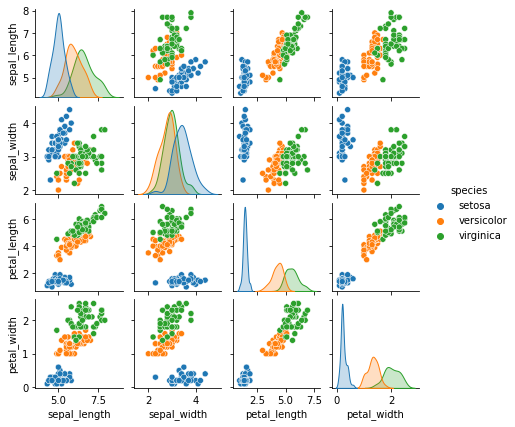

In [ ]:
%matplotlib inline
import seaborn as sns
sns.pairplot(iris, hue='species', height=1.5);

For use in Scikit-Learn, we will extract the features matrix and target array from the `DataFrame`, which we can do using some of the Pandas `DataFrame` operations discussed in [Part 3](03.00-Introduction-to-Pandas.ipynb):

In [ ]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [ ]:
y_iris = iris['species']
y_iris.shape

(150,)

## The Estimator API

The Scikit-Learn API is designed with the following guiding principles in mind, as outlined in the [Scikit-Learn API paper](http://arxiv.org/abs/1309.0238):

- *Consistency*: All objects share a common interface drawn from a limited set of methods, with consistent documentation.

- *Inspection*: All specified parameter values are exposed as public attributes.

- *Limited object hierarchy*: Only algorithms are represented by Python classes; datasets are represented
  in standard formats (NumPy arrays, Pandas `DataFrame` objects, SciPy sparse matrices) and parameter
  names use standard Python strings.

- *Composition*: Many machine learning tasks can be expressed as sequences of more fundamental algorithms,
  and Scikit-Learn makes use of this wherever possible.

- *Sensible defaults*: When models require user-specified parameters, the library defines an appropriate default value.

In practice, these principles make Scikit-Learn very easy to use, once the basic principles are understood.
Every machine learning algorithm in Scikit-Learn is implemented via the Estimator API, which provides a consistent interface for a wide range of machine learning applications.

### Basics of the API

Most commonly, the steps in using the Scikit-Learn Estimator API are as follows:

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector, as outlined earlier in this chapter.
4. Fit the model to your data by calling the `fit` method of the model instance.
5. Apply the model to new data:
   - For supervised learning, often we predict labels for unknown data using the `predict` method.
   - For unsupervised learning, we often transform or infer properties of the data using the `transform` or `predict` method.

We will now step through several simple examples of applying supervised and unsupervised learning methods.

### Supervised Learning Example: Simple Linear Regression

As an example of this process, let's consider a simple linear regression—that is, the common case of fitting a line to $(x, y)$ data.
We will use the following simple data for our regression example (see the following figure):

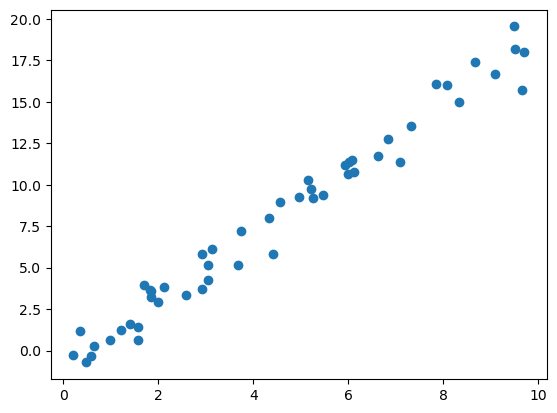

In [17]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

With this data in place, we can use the recipe outlined earlier. Let's walk through the process:

#### 1. Choose a class of model

In Scikit-Learn, every class of model is represented by a Python class.
So, for example, if we would like to compute a simple `LinearRegression` model, we can import the linear regression class:

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Note that other more general linear regression models exist as well; you can read more about them in the [`sklearn.linear_model` module documentation](http://Scikit-Learn.org/stable/modules/linear_model.html).

#### 2. Choose model hyperparameters

An important point is that *a class of model is not the same as an instance of a model*.

Once we have decided on our model class, there are still some options open to us.
Depending on the model class we are working with, we might need to answer one or more questions like the following:

- Would we like to fit for the offset (i.e., *y*-intercept)?
- Would we like the model to be normalized?
- Would we like to preprocess our features to add model flexibility?
- What degree of regularization would we like to use in our model?
- How many model components would we like to use?

These are examples of the important choices that must be made *once the model class is selected*.
These choices are often represented as *hyperparameters*, or parameters that must be set before the model is fit to data.
In Scikit-Learn, hyperparameters are chosen by passing values at model instantiation.
We will explore how you can quantitatively choose hyperparameters in [Hyperparameters and Model Validation](05.03-Hyperparameters-and-Model-Validation.ipynb).

For our linear regression example, we can instantiate the `LinearRegression` class and specify that we would like to fit the intercept using the `fit_intercept` hyperparameter:

In [26]:
LinearRegression?

Init signature:
LinearRegression(
    *,
    fit_intercept=True,
    copy_X=True,
    n_jobs=None,
    positive=False,
)
Docstring:     
Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
to minimize the residual sum of squares between the observed targets in
the dataset, and the targets predicted by the linear approximation.

Parameters
----------
fit_intercept : bool, default=True
    Whether to calculate the intercept for this model. If set
    to False, no intercept will be used in calculations
    (i.e. data is expected to be centered).

copy_X : bool, default=True
    If True, X will be copied; else, it may be overwritten.

n_jobs : int, default=None
    The number of jobs to use for the computation. This will only provide
    speedup in case of sufficiently large problems, that is if firstly
    `n_targets > 1` and secondly `X` is sparse or if `positive` is set
    to `True`. ``None`` means 1 unless in a
    :obj:`

In [25]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

Keep in mind that when the model is instantiated, the only action is the storing of these hyperparameter values.
In particular, we have not yet applied the model to any data: the Scikit-Learn API makes very clear the distinction between *choice of model* and *application of model to data*.

#### 3. Arrange data into a features matrix and target vector

Previously we examined the Scikit-Learn data representation, which requires a two-dimensional features matrix and a one-dimensional target array.
Here our target variable `y` is already in the correct form (a length-`n_samples` array), but we need to massage the data `x` to make it a matrix of size `[n_samples, n_features]`.
In this case, this amounts to a simple reshaping of the one-dimensional array:

In [23]:
X = x.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### 4. Fit the model to the data

Now it is time to apply our model to the data.
This can be done with the `fit` method of the model:

In [27]:
model.fit(X_train, y_train)

LinearRegression()

This `fit` command causes a number of model-dependent internal computations to take place, and the results of these computations are stored in model-specific attributes that the user can explore.
In Scikit-Learn, by convention all model parameters that were learned during the `fit` process have trailing underscores; for example in this linear model, we have the following:

In [28]:
model.coef_

array([1.95065705])

In [29]:
model.intercept_

-0.6981498842345069

These two parameters represent the slope and intercept of the simple linear fit to the data.
Comparing the results to the data definition, we see that they are close to the values used to generate the data: a slope of 2 and intercept of –1.

One question that frequently comes up regards the uncertainty in such internal model parameters.
In general, Scikit-Learn does not provide tools to draw conclusions from internal model parameters themselves: interpreting model parameters is much more a *statistical modeling* question than a *machine learning* question.
Machine learning instead focuses on what the model *predicts*.
If you would like to dive into the meaning of fit parameters within the model, other tools are available, including the [`statsmodels` Python package](http://statsmodels.sourceforge.net/).

#### 5. Predict labels for unknown data

Once the model is trained, the main task of supervised machine learning is to evaluate it based on what it says about new data that was not part of the training set.
In Scikit-Learn, this can be done using the `predict` method.
For the sake of this example, our "new data" will be a grid of *x* values, and we will ask what *y* values the model predicts:

As before, we need to coerce these *x* values into a `[n_samples, n_features]` features matrix, after which we can feed it to the model:

In [30]:
y_pred = model.predict(X_test)

In [89]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mean_absolute_error?

Signature:
mean_absolute_error(
    y_true,
    y_pred,
    *,
    sample_weight=None,
    multioutput='uniform_average',
)
Docstring:
Mean absolute error regression loss.

Read more in the :ref:`User Guide <mean_absolute_error>`.

Parameters
----------
y_true : array-like of shape (n_samples,) or (n_samples, n_outputs)
    Ground truth (correct) target values.

y_pred : array-like of shape (n_samples,) or (n_samples, n_outputs)
    Estimated target values.

sample_weight : array-like of shape (n_samples,), default=None
    Sample weights.

multioutput : {'raw_values', 'uniform_average'}  or array-like of shape             (n_outputs,), default='uniform_average'
    Defines aggregating of multiple output values.
    Array-like value defines weights used to average errors.

    'raw_values' :
        Returns a full set of errors in case of multioutput input.

    'uniform_average' :
        Errors of all outputs are averaged with uniform weight.

Returns
-------
loss : float or ndarray 

In [90]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

0.6811999829563495
0.7379535518473092
0.9717482347506783


Finally, let's visualize the results by plotting first the raw data, and then this model fit (see the following figure):

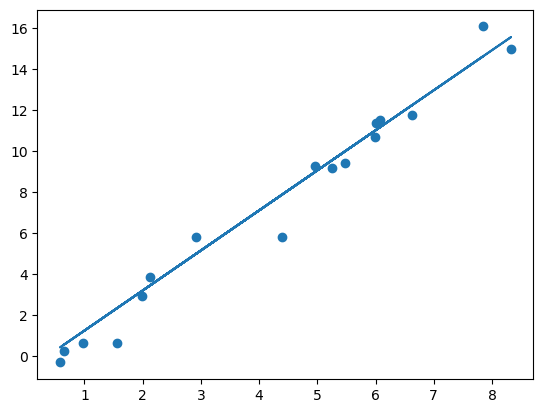

In [33]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred)